# KPI's

# Initialize + Clean

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [4]:
final_demo = 'Data assets/df_final_demo.txt'
experiments_clients = 'Data assets/df_final_experiment_clients.txt'
web_1 = 'Data assets/df_final_web_data_pt_1.txt'
web_2 = 'Data assets/df_final_web_data_pt_2.txt'

# Read the text files into DataFrames
df_final = pd.read_csv(final_demo)
df_experiments = pd.read_csv(experiments_clients)
df_web_1 = pd.read_csv(web_1)
df_web_2 = pd.read_csv(web_2)

# Combine the DataFrames into one (if needed)
df_web = pd.concat([df_web_1, df_web_2], axis=0)

In [5]:
df_final['gendr'] = df_final['gendr'].replace({'X': 'U'})
df_final['gendr'] = df_final['gendr'].fillna('U')

In [6]:
df_combined = pd.merge(df_final, df_experiments, on= 'client_id').reset_index(drop = True)
df_combined.dropna(subset=['Variation'], inplace = True)
df_web.reset_index(drop=True)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
df_combined.rename(columns={
                            'client_id': 'ClientID',
                            'clnt_tenure_yr': 'Tenure(Y)',
                            'clnt_tenure_mnth': 'Tenure(M)',
                            'clnt_age': 'Age',
                            'gendr': 'Gender',
                            'num_accts': 'Accounts(#)',
                            'bal': 'Balance',
                            'calls_6_mnth': 'Calls',
                            'logons_6_mnth': 'Logins',
                            'Variation': 'Variation'
                        }, inplace=True)

In [8]:
print(df_combined.isna().sum())

ClientID        0
Tenure(Y)      12
Tenure(M)      12
Age            13
Gender          0
Accounts(#)    12
Balance        12
Calls          12
Logins         12
Variation       0
dtype: int64


In [9]:
df_combined = df_combined.dropna()

In [10]:
# Convert columns to integers
df_combined['Tenure(Y)'] = df_combined['Tenure(Y)'].astype(int)
df_combined['Tenure(M)'] = df_combined['Tenure(M)'].astype(int)
df_combined['Accounts(#)'] = df_combined['Accounts(#)'].astype(int)
df_combined['Calls'] = df_combined['Calls'].astype(int)
df_combined['Logins'] = df_combined['Logins'].astype(int)

# Convert Age to int and round down
df_combined['Age'] = np.floor(df_combined['Age']).astype(int)

In [11]:
df_combined

,ClientID,Tenure(Y),Tenure(M),Age,Gender,Accounts(#),Balance,Calls,Logins,Variation
0,836976,6,73,60,U,2,45105.30,6,9,Test
1,2304905,7,94,58,U,2,110860.30,6,9,Control
2,1439522,5,64,32,U,2,52467.79,6,9,Test
3,1562045,16,198,49,M,2,67454.65,3,6,Test
4,5126305,12,145,33,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21,262,68,M,3,372100.59,6,9,Test
50496,6967120,21,260,68,M,3,4279873.38,6,9,Control
50497,5826160,20,249,56,F,2,44837.16,2,5,Test
50498,8739285,19,229,69,F,2,44994.24,1,4,Test


In [12]:
df_web.rename(columns={
                        'client_id': 'ClientID',
                        'visitor_id': 'visitor_id',
                        'visit_id': 'visit_id',
                        'process_step': 'process_step',
                        'date_time': 'date_time',
                    }, inplace=True)

In [13]:
df_web

,ClientID,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [14]:
df_web = df_web.drop_duplicates(subset=['ClientID', 'visit_id', 'date_time'], keep='first')

# Initial Client behavior analysis

## Test vs. Control

In [17]:
df_combined_var = df_combined['Variation'].value_counts()

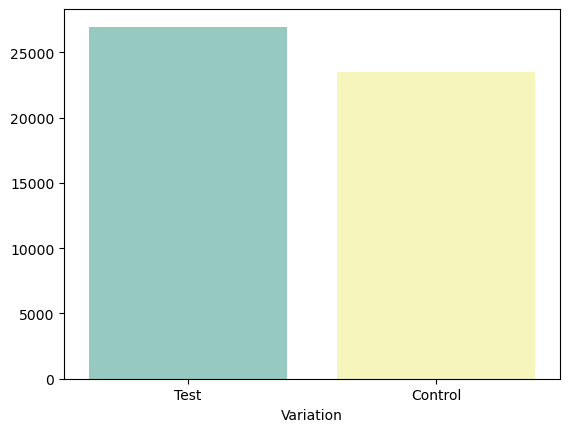

In [18]:
sns.barplot(x=df_combined_var .index, y=df_combined_var .values, palette="Set3");

<Axes: ylabel='count'>

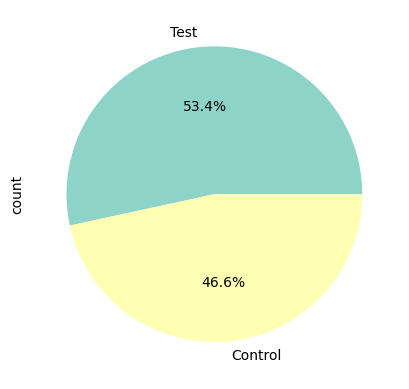

In [19]:
df_combined_var.plot.pie(autopct='%1.1f%%', startangle=360, colors=sns.color_palette("Set3"))

## Clients Ages

In [21]:
bins = [0, 20, 40, 60, df_combined['Age'].max()]
labels = ['0 - 20', '21 - 40', '41 - 60', '60+']
df_combined_cat_added = pd.cut(df_combined['Age'], bins=bins, labels=labels, include_lowest=True)
df_combined_cat_added = df_combined_cat_added.value_counts()

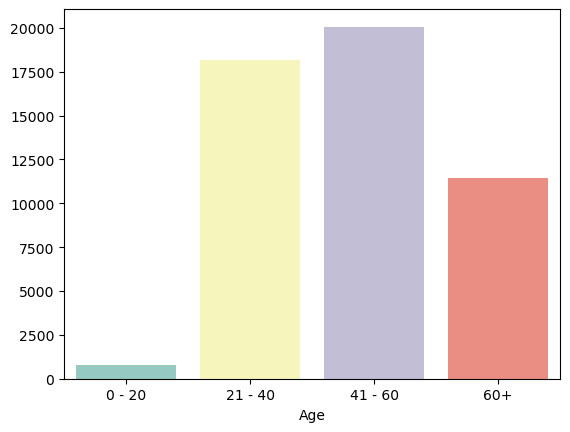

In [22]:
sns.barplot(x=df_combined_cat_added.index, y=df_combined_cat_added.values, palette="Set3");

## Clients Sex

In [24]:
df_combined_gendr_cat = df_combined['Gender'].value_counts()

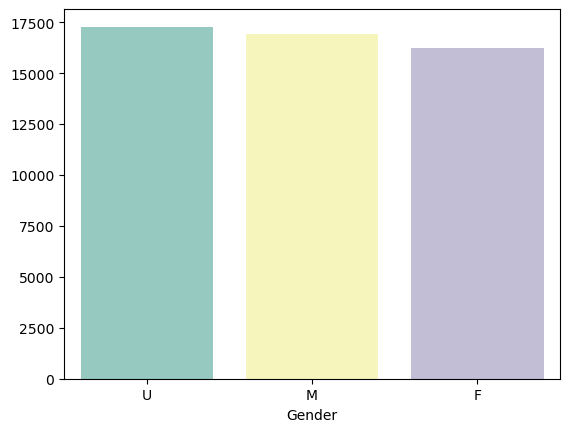

In [25]:
sns.barplot(x=df_combined_gendr_cat.index, y=df_combined_gendr_cat.values, palette="Set3");

## Clients Tenure

In [27]:
df_combined['Tenure(Y)'].describe()

count    50487.000000
mean        12.031810
std          6.860326
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: Tenure(Y), dtype: float64

In [28]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, df_combined['Tenure(Y)'].max()]
labels = ['up to 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 30', '31 - 35', '36 - 40', '41+']
df_tenure_cat = pd.cut(df_combined['Tenure(Y)'], bins=bins, labels=labels, include_lowest=True)
df_tenure_cat = df_tenure_cat.value_counts()

In [29]:
df_tenure_cat

Tenure(Y)
6 - 10     15975
11 - 15    13109
up to 5     8729
16 - 20     5710
21 - 25     4487
26 - 30     1762
31 - 35      570
36 - 40       93
41+           52
Name: count, dtype: int64

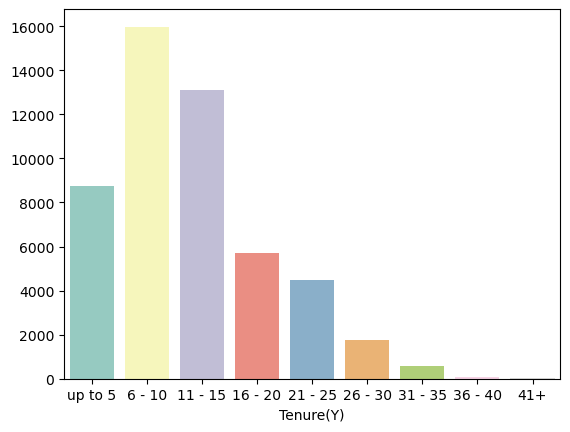

In [30]:
sns.barplot(x=df_tenure_cat.index, y=df_tenure_cat.values, palette="Set3");

# Performance Metrics

#### **Core KPIs (Already Mentioned)**
	•	Completion Rate → % of users who finished the final stage
	•	Time Spent per Step → Avg. time spent in each phase
	•	Average Number of Sessions per User → How many sessions it takes to complete

In [33]:
df_web = df_web.merge(df_combined[['ClientID', 'Variation']], on='ClientID', how='inner')

## Completion Rate:

In [35]:
# Filter data for 'Test' group and add Variation column immediately
df_test = df_web[df_web['Variation'] == 'Test'].copy()
df_test['Variation'] = 'Test'

# Calculate for 'Test' group using 'visit_id'
total_visits_test = df_test['visit_id'].nunique()
confirm_visits_test = df_test[df_test['process_step'] == 'confirm']['visit_id'].nunique()

completion_rate_test = pd.DataFrame({
    'Total Visits': [total_visits_test],
    'Visits Reached Confirm': [confirm_visits_test]
})

percentage_reached_confirm_test = (confirm_visits_test / total_visits_test) * 100
completion_rate_test['Percentage of Visits Reached Confirm'] = [f'{percentage_reached_confirm_test:.2f}%']

# Filter data for 'Control' group and add Variation column immediately
df_control = df_web[df_web['Variation'] == 'Control'].copy()
df_control['Variation'] = 'Control'

# Calculate for 'Control' group using 'visit_id'
total_visits_control = df_control['visit_id'].nunique()
confirm_visits_control = df_control[df_control['process_step'] == 'confirm']['visit_id'].nunique()

completion_rate_control = pd.DataFrame({
    'Total Visits': [total_visits_control],
    'Visits Reached Confirm': [confirm_visits_control]
})

percentage_reached_confirm_control = (confirm_visits_control / total_visits_control) * 100
completion_rate_control['Percentage of Visits Reached Confirm'] = [f'{percentage_reached_confirm_control:.2f}%']

completion_rate_test

,Total Visits,Visits Reached Confirm,Percentage of Visits Reached Confirm
0,37122,21707,58.47%


In [123]:
completion_rate_control

,Total Visits,Visits Reached Confirm,Percentage of Visits Reached Confirm
0,32181,15947,49.55%


In [125]:
completion_rate_combined

NameError: name 'completion_rate_combined' is not defined

In [36]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Number of visits that completed the "confirm" step
test_completed = completion_rate_test["Visits Reached Confirm"].sum()
control_completed = completion_rate_control["Visits Reached Confirm"].sum()

# Total number of visits in each group
total_visits_test = completion_rate_test["Total Visits"].sum()
total_visits_control = completion_rate_control["Total Visits"].sum()

# Calculate proportions
test_proportion = test_completed / total_visits_test
control_proportion = control_completed / total_visits_control

# Adjust control proportion by adding 5% threshold
required_control_proportion = control_proportion * 1.05  # 5% increase

# Run a one-tailed proportions z-test
count = np.array([test_completed, control_completed])
nobs = np.array([total_visits_test, total_visits_control])
stat, p_value = proportions_ztest(count, nobs, alternative="larger")  # One-tailed test

# Display results
print(f"Test Completion Rate: {test_proportion:.4%}")
print(f"Required Completion Rate for Cost-Effectiveness: {required_control_proportion:.4%}")
print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Significance level
alpha = 0.05
if p_value < alpha and test_proportion >= required_control_proportion:
    print("Reject the null hypothesis: Test group completion rate is significantly higher than Control group by at least 5%. The new UI is cost-effective.")
else:
    print("Fail to reject the null hypothesis: Test group completion rate is not significantly higher than Control group by 5%. The new UI is not yet cost-effective.")

Test Completion Rate: 58.4748%
Required Completion Rate for Cost-Effectiveness: 52.0318%
Z-statistic: 23.5128
P-value: 0.0000
Reject the null hypothesis: Test group completion rate is significantly higher than Control group by at least 5%. The new UI is cost-effective.


## Time Spent on Each Step

In [38]:
# Ensure that 'date_time' is in datetime format
df_web['date_time'] = pd.to_datetime(df_web['date_time'])

# Sort by visit_id and date_time
df_web = df_web.sort_values(by=['visit_id', 'date_time'])

# Group process steps into categories
step_mapping = {
    'start': 'start',  # Assuming 'start' is the initial category
    'step_1': 'step_1',
    'step_2': 'step_2',
    'step_3': 'step_3',
    'confirm': 'confirm'  # Adjust mappings as needed
}

# Apply the mapping to the 'process_step' column
df_web['process_step'] = df_web['process_step'].map(step_mapping)

# Calculate the time difference between consecutive rows (steps)
df_web['time_diff'] = df_web.groupby(['visit_id'])['date_time'].diff()

# Convert time difference to minutes
df_web['time_diff_minutes'] = round(df_web['time_diff'].dt.total_seconds() / 60, 2)

# Now, sum the time differences for each category ('process_step') by visit_id and variation
time_summary = df_web.groupby(['visit_id', 'Variation', 'process_step'])['time_diff_minutes'].sum().reset_index()

# Pivot to have process_step as columns and visit_id as index
df_web_time_spent = time_summary.pivot_table(index='visit_id', columns='process_step', values='time_diff_minutes', aggfunc='sum')

# Add Variation column back to the DataFrame
df_web_time_spent = df_web_time_spent.reset_index()
df_web_time_spent = df_web_time_spent.merge(df_web[['visit_id', 'Variation']].drop_duplicates(), on='visit_id', how='left')

# Ensure the desired process steps are present and in the correct order
df_web_time_spent = df_web_time_spent[['visit_id', 'Variation', 'step_1', 'step_2', 'step_3', 'confirm']]

# Calculate the total time per visit_id
df_web_time_spent['total_time'] = df_web_time_spent[['step_1', 'step_2', 'step_3', 'confirm']].sum(axis=1)

# Fill any missing values with 0
df_web_time_spent = df_web_time_spent.fillna(0)

# Show the resulting DataFrame
df_web_time_spent

,visit_id,Variation,step_1,step_2,step_3,confirm,total_time
0,100012776_37918976071_457913,Test,0.00,0.00,0.00,0.87,0.87
1,100019538_17884295066_43909,Test,0.68,0.22,1.88,0.95,3.73
2,100022086_87870757897_149620,Test,0.37,0.75,0.88,1.00,3.00
3,100030127_47967100085_936361,Control,0.00,0.00,0.00,0.00,0.00
4,100037962_47432393712_705583,Control,0.65,0.00,0.00,0.00,0.65
...,...,...,...,...,...,...,...
69298,999971096_28827267783_236076,Test,0.92,0.15,0.78,0.47,2.32
69299,999976049_95772503197_182554,Test,2.27,0.58,6.56,2.72,12.13
69300,999984454_18731538378_781808,Test,0.30,0.68,0.85,0.73,2.56
69301,999985675_64610694964_443659,Control,1.13,0.63,1.68,14.05,17.49


In [39]:
# Filter DataFrames for 'Test' and 'Control' groups
df_test_time = df_web_time_spent[df_web_time_spent['Variation'] == 'Test']
df_control_time = df_web_time_spent[df_web_time_spent['Variation'] == 'Control']

# Calculate average time spent for 'Test' group
average_time_per_step_test = df_test_time[['step_1', 'step_2', 'step_3', 'confirm']].mean()

# Create a DataFrame for 'Test' group
average_time_spent_test = pd.DataFrame({
    'Average Time': average_time_per_step_test
})
average_time_spent_test['Variation'] = 'Test'

# Calculate average time spent for 'Control' group
average_time_per_step_control = df_control_time[['step_1', 'step_2', 'step_3', 'confirm']].mean()

# Create a DataFrame for 'Control' group
average_time_spent_control = pd.DataFrame({
    'Average Time': average_time_per_step_control
})
average_time_spent_control['Variation'] = 'Control'

# Combine both DataFramesdf_web_time_spent
average_time_spent_combined = pd.concat([average_time_spent_test, average_time_spent_control])

# Show the resulting DataFrame
average_time_spent_combined

,Average Time,Variation
step_1,0.651899,Test
step_2,0.667880,Test
step_3,1.117956,Test
confirm,1.296569,Test
step_1,0.656741,Control
step_2,0.518064,Control
step_3,1.093551,Control
confirm,1.121495,Control


## Error Steps

In [41]:
df_web = df_web.sort_values(by=['ClientID', 'visit_id', 'date_time'])

In [42]:
# Correct order of steps
process_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Create a dictionary to map each step to its index
step_index = {step: i for i, step in enumerate(process_steps)}

In [43]:
# Compare each step with the previous one for each client and visit
df_web['prev_step'] = df_web.groupby(['ClientID', 'visit_id'])['process_step'].shift(1)

# Flag backward steps (error: when the previous step index is greater than the current step index)
df_web['error_flag'] = df_web.apply(
    lambda x: step_index.get(x['process_step'], -1) < step_index.get(x['prev_step'], -1) 
    if pd.notnull(x['prev_step']) else False, axis=1
)

In [44]:
test_exp = df_web[df_web['Variation'] == 'Test']
con_exp = df_web[df_web['Variation'] == 'Control']

In [45]:
control_error_sum = con_exp.groupby('visit_id')['error_flag'].sum()

In [46]:
test_error_sum = test_exp.groupby('visit_id')['error_flag'].sum()

In [47]:
# Group by 'ClientID' and 'Visit_ID' with 'Variation' and 'error_flag' as columns
df_client_visit_errors = df_web.groupby(['ClientID', 'visit_id']).agg({
    'Variation': 'first',  # Assuming we want the first occurrence of 'Variation' for each group
    'error_flag': 'sum'    # Sum the 'error_flag' (this will give total errors per group)
})

# Show the result with multi-level index
df_client_visit_errors

Variation  error_flag
ClientID visit_id                                          
555      637149525_38041617439_716659      Test           0
647      40369564_40101682850_311847       Test           0
934      7076463_57954418406_971348        Test           0
1028     557292053_87239438319_391157   Control           2
1104     543158812_46395476577_767725   Control           0
...                                         ...         ...
9999626  182723364_27031318473_880901      Test           0
9999729  493310979_9209676464_421146       Test           1
         870243567_56915814033_814203      Test           0
         99583652_41711450505_426179       Test           0
9999832  472154369_16714624241_585315      Test           0

[69425 rows x 2 columns]

In [48]:
# Count errors per process step for 'Test' group
step_error_counts_test = (
    df_web[df_web['Variation'] == 'Test']
    .groupby('process_step', as_index=False)['error_flag']
    .sum()
)
step_error_counts_test['Variation'] = 'Test'  # Add Variation column

# Count errors per process step for 'Control' group
step_error_counts_control = (
    df_web[df_web['Variation'] == 'Control']
    .groupby('process_step', as_index=False)['error_flag']
    .sum()
)
step_error_counts_control['Variation'] = 'Control'  # Add Variation column

# Combine both dataframes
step_error_counts = pd.concat([step_error_counts_test, step_error_counts_control], ignore_index=True)

In [49]:
step_error_counts

,process_step,error_flag,Variation
0,confirm,0,Test
1,start,10510,Test
2,step_1,3364,Test
3,step_2,2249,Test
4,step_3,5,Test
5,confirm,0,Control
6,start,4808,Control
7,step_1,2296,Control
8,step_2,2301,Control
9,step_3,1,Control


In [50]:
step_error_counts

,process_step,error_flag,Variation
0,confirm,0,Test
1,start,10510,Test
2,step_1,3364,Test
3,step_2,2249,Test
4,step_3,5,Test
5,confirm,0,Control
6,start,4808,Control
7,step_1,2296,Control
8,step_2,2301,Control
9,step_3,1,Control


In [51]:
H0: 'Test group has no significant difference in error rate than control group'
H1: 'The test group has significantly more errors than the control group.'

In [52]:
test_errors = step_error_counts[step_error_counts["Variation"] == "Test"]["error_flag"]
control_errors = step_error_counts[step_error_counts["Variation"] == "Control"]["error_flag"]

t_stat, p_value = st.ttest_ind(test_errors, control_errors, alternative='greater', equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Set significance threshold
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: 0.63095589018385, P-value: 0.27639026167621394
Fail to reject the null hypothesis


## Completion Rate with a Cost-Effectiveness Threshold

In [54]:
# Filter data for 'Test' group and add Variation column immediately
df_test = df_web[df_web['Variation'] == 'Test'].copy()
df_test['Variation'] = 'Test'

# Calculate for 'Test' group using 'visit_id'
total_visits_test = df_test['visit_id'].nunique()
confirm_visits_test = df_test[df_test['process_step'] == 'confirm']['visit_id'].nunique()

completion_rate_test = pd.DataFrame({
    'Total Visits': [total_visits_test],
    'Visits Reached Confirm': [confirm_visits_test]
})

percentage_reached_confirm_test = (confirm_visits_test / total_visits_test) * 100
completion_rate_test['Percentage of Visits Reached Confirm'] = [f'{percentage_reached_confirm_test:.2f}%']

# Filter data for 'Control' group and add Variation column immediately
df_control = df_web[df_web['Variation'] == 'Control'].copy()
df_control['Variation'] = 'Control'

# Calculate for 'Control' group using 'visit_id'
total_visits_control = df_control['visit_id'].nunique()
confirm_visits_control = df_control[df_control['process_step'] == 'confirm']['visit_id'].nunique()

completion_rate_control = pd.DataFrame({
    'Total Visits': [total_visits_control],
    'Visits Reached Confirm': [confirm_visits_control]
})

percentage_reached_confirm_control = (confirm_visits_control / total_visits_control) * 100
completion_rate_control['Percentage of Visits Reached Confirm'] = [f'{percentage_reached_confirm_control:.2f}%']

completion_rate_test

,Total Visits,Visits Reached Confirm,Percentage of Visits Reached Confirm
0,37122,21707,58.47%


In [55]:
completion_rate_control

,Total Visits,Visits Reached Confirm,Percentage of Visits Reached Confirm
0,32181,15947,49.55%


In [56]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Number of visits that completed the "confirm" step
test_completed = completion_rate_test["Visits Reached Confirm"].sum()
control_completed = completion_rate_control["Visits Reached Confirm"].sum()

# Total number of visits in each group
total_visits_test = completion_rate_test["Total Visits"].sum()
total_visits_control = completion_rate_control["Total Visits"].sum()

# Calculate proportions
test_proportion = test_completed / total_visits_test
control_proportion = control_completed / total_visits_control

# Adjust control proportion by adding 5% threshold
required_control_proportion = control_proportion * 1.05  # 5% increase

# Run a one-tailed proportions z-test
count = np.array([test_completed, control_completed])
nobs = np.array([total_visits_test, total_visits_control])
stat, p_value = proportions_ztest(count, nobs, alternative="larger")  # One-tailed test

# Display results
print(f"Test Completion Rate: {test_proportion:.4%}")
print(f"Required Completion Rate for Cost-Effectiveness: {required_control_proportion:.4%}")
print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Significance level
alpha = 0.05
if p_value < alpha and test_proportion >= required_control_proportion:
    print("Reject the null hypothesis: Test group completion rate is significantly higher than Control group by at least 5%. The new UI is cost-effective.")
else:
    print("Fail to reject the null hypothesis: Test group completion rate is not significantly higher than Control group by 5%. The new UI is not yet cost-effective.")

Test Completion Rate: 58.4748%
Required Completion Rate for Cost-Effectiveness: 52.0318%
Z-statistic: 23.5128
P-value: 0.0000
Reject the null hypothesis: Test group completion rate is significantly higher than Control group by at least 5%. The new UI is cost-effective.


## Average Number of Sessions per User → How many sessions it takes to complete

In [58]:
import pandas as pd
from scipy import stats

# Hypothesis
# H₀: The average number of sessions required to complete the process step is the same for both the Test and Control groups.
# H₁: The average number of sessions required to complete the process step is different between the Test and Control groups.

# Step 1: Identify the first and last process steps (we will assume 'start' is the first step and 'confirm' is the last step)
# Filter the data based on visit_id to get the number of sessions per visit
sessions_per_visit = df_web[df_web['process_step'] == 'confirm'][['visit_id', 'Variation']]

# Step 2: Calculate the number of sessions required for each visit (based on the visit_id)
# A visit to a process step means that visit_id appears in the process step sequence.
# So, we will count the unique number of sessions each visit_id participated in to complete the process
sessions_count = df_web.groupby('visit_id').size().reset_index(name='num_sessions')

# Step 3: Merge the sessions count with the Variation column for comparison
sessions_count = sessions_count.merge(df_web[['visit_id', 'Variation']].drop_duplicates(), on='visit_id', how='left')

# Step 4: Separate the data into Test and Control groups based on Variation
test_group_sessions = sessions_count[sessions_count['Variation'] == 'Test']
control_group_sessions = sessions_count[sessions_count['Variation'] == 'Control']

# Step 5: Calculate the average number of sessions for each group
avg_sessions_test = test_group_sessions['num_sessions'].mean()
avg_sessions_control = control_group_sessions['num_sessions'].mean()

# Print the average sessions for each group
print(f"Average Sessions for Test Group: {avg_sessions_test}")
print(f"Average Sessions for Control Group: {avg_sessions_control}")

# Step 6: Perform t-test to compare the average number of sessions between Test and Control groups
t_stat, p_value = stats.ttest_ind(
    test_group_sessions['num_sessions'],
    control_group_sessions['num_sessions'],
    equal_var=False  # Assuming unequal variance between groups
)

print(f"\nT-statistic: {t_stat}, P-value: {p_value}")

# Step 7: Decision based on p-value (typically, if p < 0.05, reject H₀)
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in the average number of sessions between Test and Control groups.")
else:
    print("Fail to reject H₀: No significant difference in the average number of sessions between Test and Control groups.")


Average Sessions for Test Group: 4.771779537740423
Average Sessions for Control Group: 4.378142382150958

T-statistic: 18.30073918624012, P-value: 1.2272775174357588e-74
Reject H₀: There is a significant difference in the average number of sessions between Test and Control groups.


In [59]:
# Hypothesis about the number of sessions required to complete a process step

from scipy import stats

# H₀: The average number of sessions required to complete the process step is the same for both Control and Test groups.
# H₁: The average number of sessions required to complete the process step is different between Control and Test groups.

# Step 1: Group by 'Variation' and 'ClientID' to count unique visit_ids (sessions) for each user
sessions_by_user = df_web.groupby(['Variation', 'ClientID'])['visit_id'].nunique()

# Step 2: Separate the sessions by 'Control' and 'Test' groups
sessions_control = sessions_by_user['Control']
sessions_test = sessions_by_user['Test']

# Step 3: Calculate the average number of sessions for each group
avg_sessions_control = sessions_control.mean()
avg_sessions_test = sessions_test.mean()

print(f'Average sessions for Control group: {avg_sessions_control}')
print(f'Average sessions for Test group: {avg_sessions_test}')

# Step 4: Perform an independent t-test to compare the two groups
t_stat, p_value = stats.ttest_ind(sessions_control, sessions_test)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Step 5: Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of sessions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of sessions.")

Average sessions for Control group: 1.3701861769956645
Average sessions for Test group: 1.379399873891918
T-statistic: -1.255050535340125
P-value: 0.2094662248388474
Fail to reject the null hypothesis: There is no significant difference in the number of sessions.


In [60]:
# 
# Group by ClientID and count unique visit_ids (sessions per user)
session_counts = df_web.groupby('ClientID')['visit_id'].nunique()

# Calculate the average number of sessions
avg_sessions_per_user = session_counts.mean()
print(f'Average number of sessions per user: {avg_sessions_per_user}')

Average number of sessions per user: 1.375106463049894


In [61]:
# Example: Average sessions for users based on 'Variation'
avg_sessions_by_variation = df_web.groupby('Variation')['visit_id'].nunique().mean()
print(f'Average sessions per user by Variation: {avg_sessions_by_variation}')

Average sessions per user by Variation: 34651.5


In [62]:
# Group by 'Variation' and 'ClientID', and count the unique 'visit_id' (sessions per user)
sessions_per_user_by_variation = df_web.groupby(['Variation'])['visit_id'].nunique()

# Now calculate the average number of sessions per user for each variation group (Test, Control)
avg_sessions_by_variation = sessions_per_user_by_variation.groupby('Variation').mean()

# Display the result
print(avg_sessions_by_variation)

Variation
Control    32181.0
Test       37122.0
Name: visit_id, dtype: float64


## **Additional KPIs to Consider: User Engagement & Drop-off Metrics**
	•	Drop-off Rate per Step → % of users who abandon the test at each phase
	•	Bounce Rate (First Step Exit Rate) → % of users who leave after the first step

##### ***Drop-off Rate per Step → % of users who abandon the test at each phase***

In [65]:
#By VISIT_ID
import pandas as pd
from scipy import stats

# Step 1: Filter visits that started the process (i.e., at 'start')
start_visits = df_web[df_web['process_step'] == 'start']

# Step 2: Identify visits that did not proceed to 'step_1' (these are the bounces)
bounced_visits = start_visits[~start_visits['visit_id'].isin(df_web[df_web['process_step'] == 'step_1']['visit_id'])]

# Step 3: Create a column that flags visits which bounced (1 if bounced, 0 if they proceeded to the next step)
start_visits['bounce_flag'] = start_visits['visit_id'].isin(bounced_visits['visit_id']).astype(int)

# Step 4: Calculate bounce rate overall for all visits
overall_bounce_rate = start_visits['bounce_flag'].mean() * 100

# Step 5: Calculate bounce rate by Variation (Test vs Control)
bounce_rate_by_variation = start_visits.groupby('Variation')['bounce_flag'].mean() * 100

# Print the overall bounce rate and the bounce rate by Variation (Test and Control)
print(f"Overall Bounce Rate: {overall_bounce_rate}%")
print("\nBounce Rate by Variation (Test vs Control):")
print(bounce_rate_by_variation)

# Hypothesis
# H₀: The bounce rate is the same for both the Test and Control groups when measured by visit_id.
# H₁: The bounce rate is different between the Test and Control groups when measured by visit_id.

# Step 6: Perform t-test to compare bounce rates between the Test and Control groups
test_group_bounce = start_visits[start_visits['Variation'] == 'Test']
control_group_bounce = start_visits[start_visits['Variation'] == 'Control']

# Perform t-test between the two groups based on bounce_flag (1 = bounced, 0 = proceeded)
t_stat, p_value = stats.ttest_ind(
    test_group_bounce['bounce_flag'],
    control_group_bounce['bounce_flag'],
    equal_var=False  # Assuming unequal variance between groups
)

print(f"\nT-statistic: {t_stat}, P-value: {p_value}")

# Step 7: Decision based on p-value (typically, if p < 0.05, reject H₀)
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in the bounce rate between Test and Control groups.")
else:
    print("Fail to reject H₀: No significant difference in the bounce rate between Test and Control groups.")


Overall Bounce Rate: 20.877838436585172%

Bounce Rate by Variation (Test vs Control):
Variation
Control    26.562466
Test       16.252623
Name: bounce_flag, dtype: float64

T-statistic: -39.70641366766876, P-value: 0.0
Reject H₀: There is a significant difference in the bounce rate between Test and Control groups.


In [66]:
# By Client ID
import pandas as pd
from scipy import stats

# Sort the dataframe by 'ClientID' and 'date_time' to ensure the order of steps
df_web_sorted = df_web.sort_values(by=['ClientID', 'date_time'])

# Identify the next process_step for each user (shift(-1) to get the next step)
df_web_sorted['next_step'] = df_web_sorted.groupby('ClientID')['process_step'].shift(-1)

# Determine if the user dropped off at the current step (True if next_step is NaN, i.e., no further steps)
df_web_sorted['drop_off'] = df_web_sorted['next_step'].isna()

# Calculate drop-off rate per step (percentage of users who abandon the process at each step)
drop_off_per_step = df_web_sorted.groupby('process_step')['drop_off'].mean() * 100

# Calculate drop-off rate by Variation (Test vs. Control) and process_step
drop_off_by_variation = df_web_sorted.groupby(['Variation', 'process_step'])['drop_off'].mean() * 100

# Hypotheis
# H₀: The drop-off rate per step is the same for both the Test and Control groups
# H₁: The drop-off rate per step is different between the Test and Control groups

# Perform t-test for drop-off rates at each step for Test vs. Control groups
for step in ['start', 'step_1', 'step_2', 'step_3', 'confirm']:
    test_group_dropoff = df_web_sorted[(df_web_sorted['Variation'] == 'Test') & (df_web_sorted['process_step'] == step)]['drop_off']
    control_group_dropoff = df_web_sorted[(df_web_sorted['Variation'] == 'Control') & (df_web_sorted['process_step'] == step)]['drop_off']
    
    # Perform t-test between Test and Control for the current process_step
    t_stat, p_value = stats.ttest_ind(test_group_dropoff, control_group_dropoff, equal_var=False)
    
    print(f"\nProcess Step: {step}")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    
    # Decision based on p-value (typically, if p < 0.05, reject H₀)
    if p_value < 0.05:
        print(f"Reject H₀: There is a significant difference in the drop-off rate at step '{step}' between Test and Control groups.")
    else:
        print(f"Fail to reject H₀: No significant difference in drop-off rate at step '{step}' between Test and Control groups.")



Process Step: start
T-statistic: -11.501683426004023, P-value: 1.3568946969326905e-30
Reject H₀: There is a significant difference in the drop-off rate at step 'start' between Test and Control groups.

Process Step: step_1
T-statistic: -17.619532212934722, P-value: 2.734831755852001e-69
Reject H₀: There is a significant difference in the drop-off rate at step 'step_1' between Test and Control groups.

Process Step: step_2
T-statistic: -7.823159756748126, P-value: 5.253593885920745e-15
Reject H₀: There is a significant difference in the drop-off rate at step 'step_2' between Test and Control groups.

Process Step: step_3
T-statistic: -9.554264916504986, P-value: 1.306932487224417e-21
Reject H₀: There is a significant difference in the drop-off rate at step 'step_3' between Test and Control groups.

Process Step: confirm
T-statistic: -20.043907223530045, P-value: 6.302372984914511e-89
Reject H₀: There is a significant difference in the drop-off rate at step 'confirm' between Test and Co

Interpretation:
If the p-value is less than 0.05, you reject the null hypothesis and conclude there is a statistically significant difference in drop-off rates between the Test and Control groups.
If the p-value is greater than or equal to 0.05, you fail to reject the null hypothesis, indicating no significant difference in drop-off rates between the two groups.

##### ***Bounce Rate (First Step Exit Rate) → users who leave after the first step***

In [69]:
import pandas as pd
from scipy import stats

#Bounce Detection: A visit is considered a bounce if it starts (process_step == 'start') but does not proceed to step_1.

# Step 1: Filter visits that started the process (i.e., at 'start')
start_visits = df_web[df_web['process_step'] == 'start']

# Step 2: Identify visits that did not proceed to 'step_1' (these are the bounces)
bounced_visits = start_visits[~start_visits['visit_id'].isin(df_web[df_web['process_step'] == 'step_1']['visit_id'])]

# Step 3: Create a column that flags visits which bounced (1 if bounced, 0 if they proceeded to the next step)
start_visits['bounce_flag'] = start_visits['visit_id'].isin(bounced_visits['visit_id']).astype(int)

# Step 4: Calculate bounce rate overall for all visits
overall_bounce_rate = start_visits['bounce_flag'].mean() * 100

# Step 5: Calculate bounce rate by Variation (Test vs Control)
bounce_rate_by_variation = start_visits.groupby('Variation')['bounce_flag'].mean() * 100

# Print the overall bounce rate and the bounce rate by Variation (Test and Control)
print(f"Overall Bounce Rate: {overall_bounce_rate}%")
print("\nBounce Rate by Variation (Test vs Control):")
print(bounce_rate_by_variation)

# Hypothesis 
# H₀: The bounce rate (first step exit rate) is the same for both the Test and Control groups, when measured by visit (visit_id).
# H₁: The bounce rate (first step exit rate) is different between the Test and Control groups, when measured by visit (visit_id).

# Step 6: Perform t-test to compare bounce rates between the Test and Control groups
test_group_bounce = start_visits[start_visits['Variation'] == 'Test']
control_group_bounce = start_visits[start_visits['Variation'] == 'Control']

# Perform t-test between the two groups based on bounce_flag (1 = bounced, 0 = proceeded)
t_stat, p_value = stats.ttest_ind(
    test_group_bounce['bounce_flag'],
    control_group_bounce['bounce_flag'],
    equal_var=False  # Assuming unequal variance between groups
)

print(f"\nT-statistic: {t_stat}, P-value: {p_value}")

# Step 7: Decision based on p-value (typically, if p < 0.05, reject H₀)
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in the bounce rate between Test and Control groups.")
else:
    print("Fail to reject H₀: No significant difference in the bounce rate between Test and Control groups.")

Overall Bounce Rate: 20.877838436585172%

Bounce Rate by Variation (Test vs Control):
Variation
Control    26.562466
Test       16.252623
Name: bounce_flag, dtype: float64

T-statistic: -39.70641366766876, P-value: 0.0
Reject H₀: There is a significant difference in the bounce rate between Test and Control groups.


Interpretation:
If the p-value is less than 0.05, you reject the null hypothesis and conclude that there is a significant difference in bounce rates between the Test and Control groups.
If the p-value is greater than or equal to 0.05, you fail to reject the null hypothesis, meaning no significant difference in bounce rates between the two groups.